In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

128
288
(288, 128)


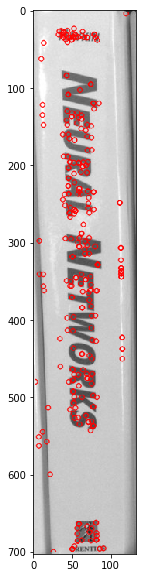

In [2]:
img = cv2.imread('051.jpg', 0)

surf = cv2.xfeatures2d.SIFT_create()

orb = cv2.ORB_create(nfeatures = 3000)
 
keypoints, descriptors = surf.detectAndCompute(img, None)

#print(surf.hessianThreshold)
print(surf.descriptorSize())
 
img = cv2.drawKeypoints(img, keypoints, None, (255, 0, 0))

#print(keypoints)
print(len(keypoints))
print(descriptors.shape)

plt.figure(figsize = (15, 10))
plt.imshow(img, cmap = "gray")

(349, 32)
(500, 32)


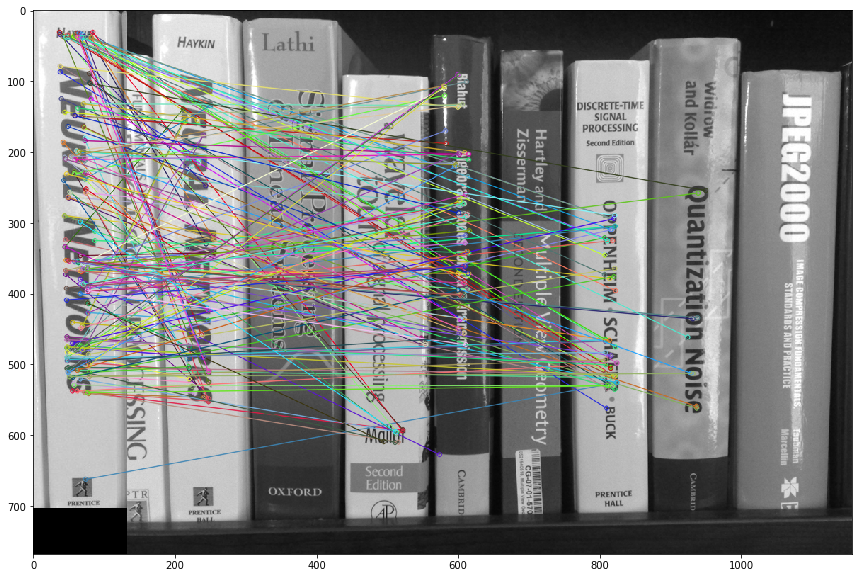

(<matplotlib.image.AxesImage at 0x11e02500b70>, None)

In [51]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('051.jpg',0)          # queryImage
img2 = cv2.imread('05.jpg',0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

print(des1.shape)
print(des2.shape)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = np.array([])
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches, flags=2, outImg=img3)

plt.figure(figsize=(15, 10))
plt.imshow(img3),plt.show()

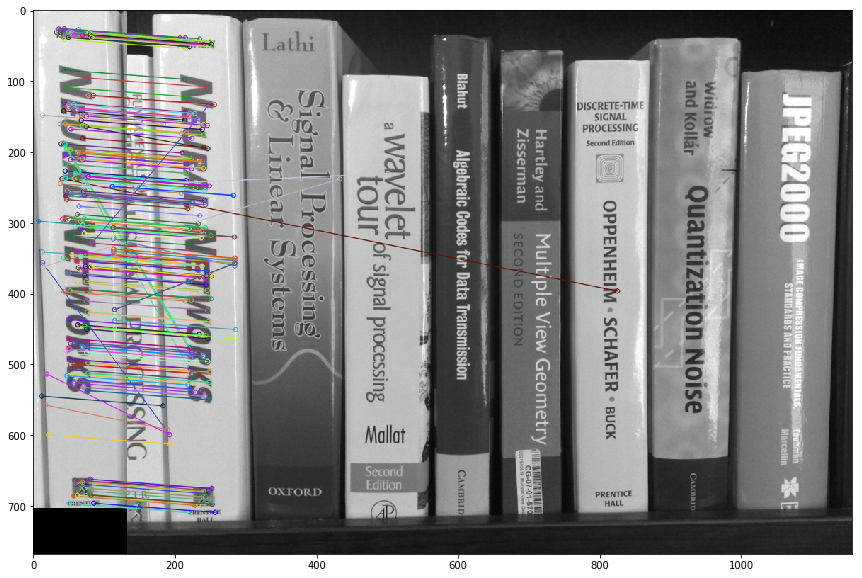

(<matplotlib.image.AxesImage at 0x11e01048128>, None)

In [40]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('051.jpg',0)          # queryImage
img2 = cv2.imread('05.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = np.array([])
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2, outImg = img3)

plt.figure(figsize=(15, 10))
plt.imshow(img3),plt.show()

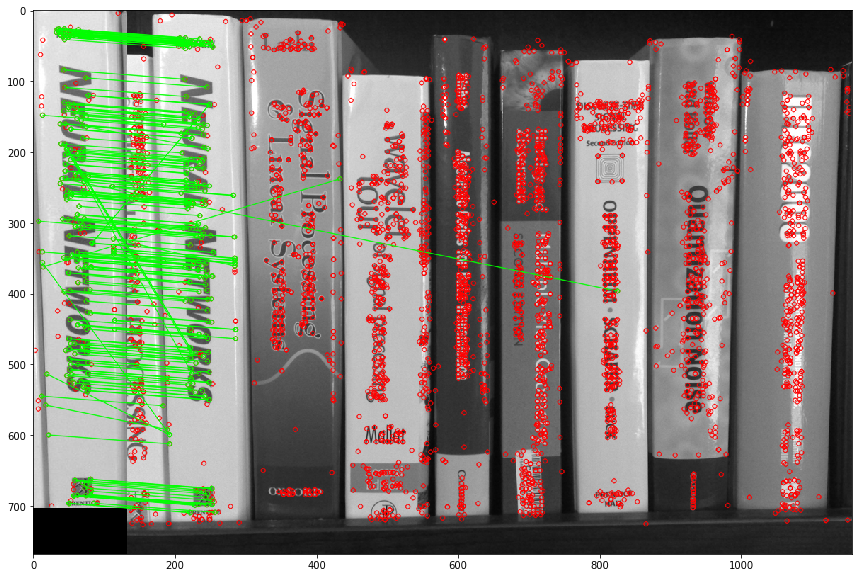

(<matplotlib.image.AxesImage at 0x2602e3f51d0>, None)

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('051.jpg',0)          # queryImage
img2 = cv2.imread('05.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure(figsize = (15, 10))
plt.imshow(img3,),plt.show()

[[[ 37.995205  13.116276]]

 [[ 38.005997 715.0135  ]]

 [[170.01855  714.98883 ]]

 [[170.03433   12.800243]]]


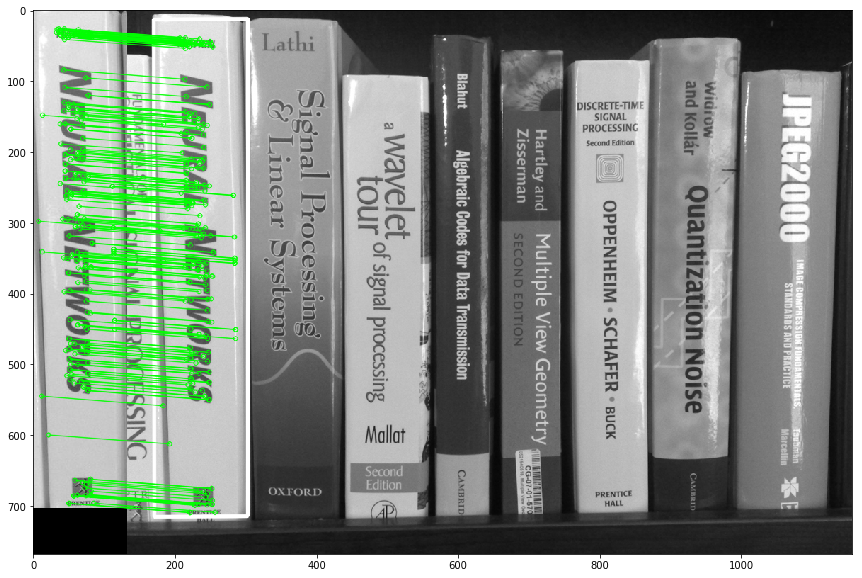

(<matplotlib.image.AxesImage at 0x11e01071470>, None)

In [58]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('051.jpg',0)          # queryImage
img2 = cv2.imread('05.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    
    print(dst)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure(figsize = (15, 10))
plt.imshow(img3, 'gray'),plt.show()

In [8]:
import os

scanned = 'testimages/051.jpg'
surf = cv2.xfeatures2d.SURF_create(400)
surf.setUpright(True)

img1 = cv2.imread(scanned, 0)
kp1, des1 = surf.detectAndCompute(img1, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

#flann = cv2.FlannBasedMatcher(index_params, search_params)
flann = cv2.flann.Index()

for filename in os.listdir('testimages'):
    img2 = cv2.imread('testimages/' + filename, 0)
    kp2, des2 = surf.detectAndCompute(img2, None)
    flann.add([des2])

print(str(len(flann.getTrainDescriptors())))

print("Training...")
#flann.train()
flann.build(des_all, index_params)

print("Matching...")
indexes, matches = flann.knnSearch(des1, params={})

AttributeError: module 'cv2.flann' has no attribute 'Index'